<a href="https://colab.research.google.com/github/VSennaa/ml_classification_marketing/blob/main/classification_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning

## Concept

**Artificial Intelligence (AI)** has emerged as a rapidly growing field, encompassing various theoretical and practical domains such as computer science, cognitive science, philosophy of mind, and Machine Learning.

**Machine Learning (ML)**, a subfield of AI, focuses on developing algorithms capable of learning to perform tasks from data, without the need for manually programmed rules. These algorithms identify patterns in the data and use this knowledge to make predictions.

How Machine Learning Works
The Machine Learning process can be divided into three main stages:

1.  **Data Collection**
The foundation of any ML project is data collection. The amount and quality of the data directly influence the model's ability to learn real-world patterns.

2.   **Model Training**
With the data prepared, algorithms seek to identify patterns and create rules that will be applied to new data.


3.   **Evaluation**
After training, the model's performance is tested to verify whether it generalizes well and correctly applies the learned rules to unseen data.

In addition to these main steps, ML projects may involve other specific tasks depending on the nature of the data, the application, and the challenges encountered throughout the process.



# Classification: Investment Marketing

The objective is to analyze a marketing campaign in order to predict investment adherence, using data collected from clients. This prediction will be performed using machine learning, and this notebook contains the necessary steps to carry out this prediction.

# Exploratory Analysis

## Reading the Data

We can read the data using the pandas library. Therefore, let's import the library with the command 'import pandas as pd'.

Since the data file is in CSV format, we will read it using the function read_csv().


In [163]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# URL to dataset
dt_url = 'https://raw.githubusercontent.com/VSennaa/ifminingbigdata/refs/heads/main/marketing_investimento%20-%20marketing_investimento.csv.csv'

# Reading the data
raw_marketing_invest = pd.read_csv(dt_url)

# Displaying the raw dataset
raw_marketing_invest

# Assigning the dataset to a variable for further processing
data = raw_marketing_invest


In [164]:
raw_marketing_invest.isnull().sum() # Checking for Nulls values

,0
idade,0
estado_civil,0
escolaridade,0
inadimplencia,0
saldo,0
fez_emprestimo,0
tempo_ult_contato,0
numero_contatos,0
aderencia_investimento,0


In [165]:
raw_marketing_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Exploring the data

Let's explore each column in the dataset using the **Plotly** library. We'll start with the categorical variables and then move on to the numerical ones.

### category variables

In [166]:
print(f"{data.estado_civil.unique()} \n{data.escolaridade.unique()}\n {data.fez_emprestimo.unique()}\n{data.inadimplencia.unique()}\n{data.aderencia_investimento.unique()}")

['casado (a)' 'solteiro (a)' 'divorciado (a)'] 
['superior' 'medio' 'fundamental']
 ['nao' 'sim']
['nao' 'sim']
['sim' 'nao']


In [167]:
# Importing the plotly.express library for visualization
import plotly.express as px

# Creating a histogram to visualize the distribution of 'aderencia_investimento' column
fig = px.histogram(data,
                   x="aderencia_investimento",  # Column to be visualized
                   text_auto=True)  # Automatically add text labels to the bars

# Displaying the plot
fig.show()


In [168]:
# Importing the plotly.express library for visualization
import plotly.express as px

# Creating a grouped histogram to visualize the distribution of 'estado_civil' with respect to 'aderencia_investimento'
fig2 = px.histogram(data,
                   x="estado_civil",  # Column for the x-axis
                   text_auto=True,  # Automatically add text labels to the bars
                   color="aderencia_investimento",  # Color the bars based on 'aderencia_investimento'
                   barmode="group")  # Group the bars for better comparison

# Displaying the plot
fig2.show()


### Numeric variables

In [169]:
# Importing the plotly.express library for visualization
import plotly.express as px

# Creating a grouped histogram to visualize the distribution of 'escolaridade' with respect to 'aderencia_investimento'
fig3 = px.histogram(data,
                   x="escolaridade",  # Column for the x-axis
                   text_auto=True,  # Automatically add text labels to the bars
                   color="aderencia_investimento",  # Color the bars based on 'aderencia_investimento'
                   barmode="group")  # Group the bars for better comparison

# Displaying the plot
fig3.show()


In [170]:
# Importing the plotly.express library for visualization
import plotly.express as px

# Creating a grouped histogram to visualize the distribution of 'inadimplencia' with respect to 'aderencia_investimento'
fig4 = px.histogram(data,
                   x="inadimplencia",  # Column for the x-axis
                   text_auto=True,  # Automatically add text labels to the bars
                   color="aderencia_investimento",  # Color the bars based on 'aderencia_investimento'
                   barmode="group")  # Group the bars for better comparison

# Displaying the plot
#fig4.show()


In [171]:
#px.box(data, y="idade", color = "aderencia_investimento")

In [172]:
#px.box(data, y="saldo", color = "aderencia_investimento")

In [173]:
#px.box(data, x="tempo_ult_contato", color = "aderencia_investimento")

In [174]:
#px.box(data, x="numero_contatos", color = "aderencia_investimento")

# Data transform

## Explanatory Variables and Target Variable

To predict values with a machine learning model, we need to separate the target variable and explanatory variables. **Y** represents the variable we want to predict, while **X** represents all the variables that will be used to explain the behavior of **y**.

In [175]:
# Separating the explanatory variables (X) from the target variable (y)
x = data.drop("aderencia_investimento", axis=1)  # Drop the target variable from the dataset for explanatory variables
y = data["aderencia_investimento"]  # Select the target variable

# Displaying the first 2 rows of the explanatory variables and target variable (commented out)
# x.head(2)
# y.head(2)

## Transforming the variables into explanatory

Machine learning algorithms do not understand text data, so we need to transform the data into a numeric format for the algorithm to understand the information. This transformation must be done in a way that does not alter the original information in the dataset, so it’s not enough to simply change the values to random numeric values.

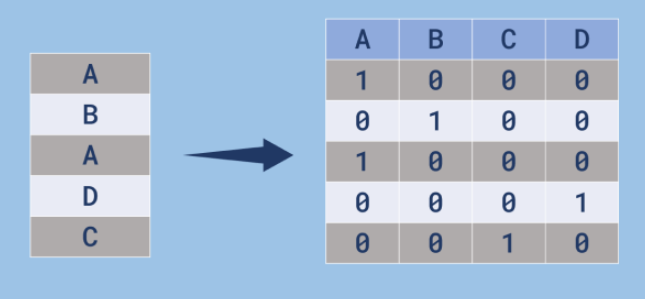

In [176]:
colunas = x.columns
# Importing necessary libraries for column transformations
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Separating the explanatory variables (X) and the target variable (y)
x = data.drop("aderencia_investimento", axis=1)  # Drop the target variable from the dataset for explanatory variables
y = data["aderencia_investimento"]  # Select the target variable

# Creating a column transformer for one-hot encoding categorical variables
one_hot = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']),  # Apply OneHotEncoder to the specified columns
    remainder='passthrough',  # Do not exclude numeric values (keep them as is)
    sparse_threshold=0  # Do not use sparse matrices (dense output)
)

# Fitting and transforming the data with the one-hot encoder
X = one_hot.fit(x)

# Storing the transformed data into 'one_hot_modelo_x' for further use
one_hot_modelo_x = X

# Transforming the original dataset 'x' into the one-hot encoded format
X = X.transform(x)

In [178]:
one_hot_modelo_x #Printing the X content model for futher use

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['estado_civil', 'escolaridade',
                                  'inadimplencia', 'fez_emprestimo'])])

In [179]:
colunas_novas = one_hot.get_feature_names_out(colunas)
pd.DataFrame(X, columns = colunas_novas)

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transforming target variables

Just like the explanatory variables, the target variable also needs to be transformed into numeric format. We can represent binary target variables as 0 or 1, where 0 indicates the absence of the feature and 1 represents the presence of the feature.

In [180]:
# Importing LabelEncoder from scikit-learn to encode the target variable (binary encoding)
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
lb_enc = LabelEncoder()

# Fitting the label encoder to the target variable 'y' and transforming it into numeric values (0 or 1)
y = lb_enc.fit_transform(y)

# Displaying the transformed target variable
y


array([1, 1, 0, ..., 1, 1, 1])

# Adjusting Models

## Dividing the data between train and test

To understand if the model is truly learning from the data, we need to split the data into **training** and **testing** sets. The training data is used to fit the model, while the test data is used to assess how well the model has learned on data that was not used during the fitting process

In [181]:
# Importing the train_test_split function from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (25% for testing, 75% for training)
x_test, x_train, y_test, y_train = train_test_split(X, y, test_size=0.25)

# Displaying the training and testing sets before applying any balancing
x_train  # The training data
x_test  # The testing data

# Splitting again, but now with the 'stratify' parameter to balance the classes in a way that matches the original data proportions
x_test, x_train, y_test, y_train = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1234)

# Displaying the balanced testing set
x_test


array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 8.79e+02, 6.00e+01, 4.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 2.05e+02, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 1.24e+03, 5.05e+02, 2.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 1.03e+02, 3.14e+02, 1.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 2.20e+01, 2.65e+02, 2.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 8.42e+02, 2.73e+02, 1.00e+00]])

## Base model

The simplest model for classifying data is to use an algorithm that predicts all classifications to the class with the highest frequency. This algorithm serves as a benchmark to compare whether other models perform better than the simplest possible classification.


In [182]:
# Importing the DummyClassifier from scikit-learn to use a simple classification model
from sklearn.dummy import DummyClassifier

# Instantiating the Dummy model (a simple baseline model)
dummy = DummyClassifier()

# Fitting the Dummy model to the training data
dummy.fit(x_train, y_train)

# Making predictions on the test data
dummy.predict(x_test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [183]:
dummy.score(x_test,y_test)

0.6046267087276551

## Decision Tree


The decision tree model is widely used for its high **explainability** and **fast processing**, while maintaining a quite interesting performance.

It is based on simple decisions made by the algorithm, separating the data based on **lesser** and **greater** comparisons of the values in the dataset's columns.

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Instantiating the decision tree classifier
tree = DecisionTreeClassifier(random_state = 4321, max_depth= 3)

# Fitting the tree model to the training data
tree = tree.fit(x_train, y_train)

# Evaluating the model on the test data
tree.score(x_test,y_test)


0.729758149316509

In [185]:
colunas_novissimas= ['casado (a)',
       'divorciado (a)',
       'solteiro (a)',
       'fundamental',
       'medio',
       'superior',
       'inadimplencia',
       'fez_emprestimo',
	'idade',
       'saldo', 'tempo_ult_contato',
       'numero_contatos']

#plt.figure(figsize=(200,200))
#plot_tree(tree, feature_names = colunas_novissimas, filled = True, class_names = ['Sim' , 'Não'])

# Selecting the Models

## Data Normalizing

Some algorithms may assign more weight to variables with larger scale values, which can distort the actual importance of the variables. For example, an algorithm may give more importance to salary than age simply because salary values are larger. To prevent this, it is necessary to transform the data so that all variables are on the same scale, ensuring a fairer and more accurate analysis.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [186]:
# Importing the MinMaxScaler for data normalization
from sklearn.preprocessing import MinMaxScaler

# Instantiating the MinMaxScaler to normalize the data to the [0, 1] range
minmax = MinMaxScaler()

# Applying normalization to the training data
x_train_normalized = minmax.fit_transform(x_train)

# Applying normalization to the testing data (using the parameters from the training data)
x_test_normalized = minmax.transform(x_test)


## KNN

The KNN algorithm relies on calculating the distance between records in the dataset and looks for elements that are close to each other (neighbors) to make classification decisions.

Because it uses distance calculations, this algorithm is influenced by the scale of the variables, and therefore, data transformation is required before using this method.

In [187]:
# Importing the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the KNN model with 5 neighbors (default would be 3)
neighbors = KNeighborsClassifier(n_neighbors=5)

# Fitting the KNN model to the normalized training data
knn_modelo = neighbors.fit(x_train_normalized, y_train)

# Evaluating the model's performance on the normalized test data
knn_modelo.score(x_test_normalized, y_test)


0.6729758149316509

 ## Choosing and Saving the Best Model

At the end of a machine learning project, we should compare the results of different models and choose the one that performs the best.


In [188]:
# Creating a dictionary with the accuracy scores of different models
score_modelos = {"Dummy": dummy.score(x_test, y_test),
                 "Arvore": tree.score(x_test, y_test),
                 "KNN": knn_modelo.score(x_test_normalized, y_test)}

# Finding the best model based on the highest accuracy score
melhor_modelo = max(score_modelos, key = score_modelos.get)

# Printing the best model and its corresponding accuracy score
print(f"The best model was {melhor_modelo} with {round(score_modelos[melhor_modelo], 2)}")


The best model was Arvore with 0.73


## Pickle Dump

We can store the model in a serialized file using pickle so that it can be used in production, meaning with real-world data to meet the needs of the problem that needs to be solved.

In [189]:
# Storing the decision tree model in a pickle file for later use
pd.to_pickle(tree, "arvore_inadimplencia.pkl")

# Storing the column encoder model in a pickle file for later use
pd.to_pickle(one_hot_modelo_x, "enconder_colunas.pkl")


## Using the Model



In [190]:
novo_dado = {
    'idade': [101],
    'estado_civil': ['solteiro (a)'],
    'escolaridade': ['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['sim'],
    'tempo_ult_contato': [200],
    'numero_contatos': [8]
}
df_novo_dado = pd.DataFrame(novo_dado)
df_novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,101,solteiro (a),superior,nao,23040,sim,200,8


Test with return 1

In [191]:
# Load the pre-trained one-hot encoder model
one_hot_modelo = pd.read_pickle("enconder_colunas.pkl")

# Transform the new data with the same encoder
novissimo = one_hot_modelo.transform(df_novo_dado)

# Load the pre-trained decision tree model
modelo_arvore = pd.read_pickle("arvore_inadimplencia.pkl")

# Use the decision tree model to make a prediction on the transformed data
predicao = modelo_arvore.predict(novissimo)

# Output the prediction result
predicao


array([1])

Test with return 0

In [192]:
novo_dado = {
    'idade': [45],  # Idade mais alta, provavelmente não muito influente para aderência
    'estado_civil': ['divorciado (a)'],  # Estado civil que pode ser associado a um comportamento específico
    'escolaridade': ['medio'],  # Nível de escolaridade baixo, pode reduzir a chance de aderir
    'inadimplencia': ['sim'],  # Indicação de inadimplência, o que pode diminuir a chance de aderir
    'saldo': [2000],  # Saldo baixo, possivelmente sem recursos para investir
    'fez_emprestimo': ['nao'],  # Não fez empréstimo, talvez indicando uma menor disposição para investir
    'tempo_ult_contato': [10],  # Pouco tempo de contato, o que pode indicar falta de interesse
    'numero_contatos': [2]  # Número de contatos baixo, talvez indicando pouca interação com o marketing
}

# Transformação dos dados
df_novo_dado = pd.DataFrame(novo_dado)

# Realiza a transformação usando o OneHotEncoder
novissimo = one_hot_modelo.transform(df_novo_dado)

# Predição usando o modelo de árvore de decisão
modelo_arvore.predict(novissimo)




array([0])